# Loading data

First, an Excel spreadsheet was made by hand containing three columns: Chinatown location, latitude, and longitude.  
This was accomplished with basic online searching.  
  
Let's load the spreadsheet and make it a pandas data frame to start the analysis.

In [1]:
import pandas as pd
data = pd.read_excel("/Users/Ayan/Desktop/Coordinates of Chinatowns.xlsx")
data

,Location,Latitude,Longitude
0,"New York, NY, USA",40.717664,-74.001500
1,"Chicago, IL, USA",41.851215,-87.634422
2,"Los Angeles, CA, USA",34.062888,-118.237890
3,"San Francisco, CA, USA",37.790164,-122.404332
4,"Philadelphia, PA, USA",39.953500,-75.156300
5,"Houston, TX, USA",29.705000,-95.545300
6,"Honolulu, HI, USA",21.307499,-157.858497
7,"Portland, OR, USA",45.525280,-122.672460
8,"Boston, MA, USA",42.350100,-71.062400
9,"Melbourne, Australia",-37.811800,144.967600


# Required packages and installations

Before the analysis can be performed, the necessary packages must be downloaded.  
Note that some of these require a computer installation before the import process.

In [2]:
import numpy as np # library to handle data in a vectorized manner

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


# Map representing Chinatown locations  

It is always helpful to visualize the data in the best way possible. Since this analysis employs location data,  
a helpful visual woulbe be a world map representing all of the Chinatown locations.

In [3]:
#The coordinates used to create the world map are those of Paris, France. This is because they provide an ideal
#center point for the map.
world_map = folium.Map(location = [48.864716, 2.349014], zoom_start = 2)
for lat, lng, label in zip(data['Latitude'], data['Longitude'], data['Location']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(world_map)  
    
world_map

# Getting nearby venues

For each Chinatown location, all of the venues in the radius of 350 meters will be found.  
Then, it will be possible to see how many venues there are for each Chinatown.

In [4]:
#This function will run through each Chinatown location and report venues in the radius of 350 meters.
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=350):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [5]:
#My FourSquare API credentials
CLIENT_ID = '1OU0LHHXYPCNBMLKWU0DGZLA3QQJIWUWP30SFSQFQQCS1EDS' # my Foursquare ID
CLIENT_SECRET = 'I0AXZLG2FGRSZQ51OTCPD4TDMWR2IKPTP0HOOFGDM2BZGL3J' # my Foursquare Secret
VERSION = '20200101' #Venues as of January 1st, 2020.

In [6]:
ct_venues = getNearbyVenues(names = data['Location'],
                                   latitudes = data['Latitude'],
                                   longitudes = data['Longitude']
                                  )

New York, NY, USA
Chicago, IL, USA
Los Angeles, CA, USA
San Francisco, CA, USA
Philadelphia, PA, USA
Houston, TX, USA
Honolulu, HI, USA
Portland, OR, USA
Boston, MA, USA
Melbourne, Australia
Toronto, Canada
Paris, France
London, UK
Amsterdam, Netherlands
Lima, Peru
Manchester, UK


## Data frame containing all of the venues.

In [7]:
ct_venues

,Location,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"New York, NY, USA",40.717664,-74.001500,Hair Toto Group,40.718629,-73.999593,Salon / Barbershop
1,"New York, NY, USA",40.717664,-74.001500,Le Coucou,40.719114,-74.000202,French Restaurant
2,"New York, NY, USA",40.717664,-74.001500,SKY TING YOGA,40.718124,-74.003051,Yoga Studio
3,"New York, NY, USA",40.717664,-74.001500,New York Pilates - Soho,40.719370,-74.000555,Pilates Studio
4,"New York, NY, USA",40.717664,-74.001500,Boba Guys,40.718830,-74.001014,Bubble Tea Shop
5,"New York, NY, USA",40.717664,-74.001500,Magic Jewelry,40.717833,-74.000120,Jewelry Store
6,"New York, NY, USA",40.717664,-74.001500,Spring Café,40.717857,-74.000200,Café
7,"New York, NY, USA",40.717664,-74.001500,Canal Street Market,40.718890,-74.000994,Flea Market
8,"New York, NY, USA",40.717664,-74.001500,Joe’s Steam Rice Roll,40.718852,-74.001025,Chinese Restaurant
9,"New York, NY, USA",40.717664,-74.001500,Blue Bottle Coffee,40.718355,-74.002215,Coffee Shop


## Let's see how many venues there are per each Chinatown location.

In [8]:
ct_venues.groupby('Location').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Location,,,,,,
"Amsterdam, Netherlands",76,76,76,76,76,76
"Boston, MA, USA",75,75,75,75,75,75
"Chicago, IL, USA",40,40,40,40,40,40
"Honolulu, HI, USA",15,15,15,15,15,15
"Houston, TX, USA",31,31,31,31,31,31
"Lima, Peru",29,29,29,29,29,29
"London, UK",68,68,68,68,68,68
"Los Angeles, CA, USA",35,35,35,35,35,35
"Manchester, UK",83,83,83,83,83,83


In [9]:
print('There are {} uniques venue categories.'.format(len(ct_venues['Venue Category'].unique())))

There are 189 uniques venue categories.


# Getting most common venues 

Now that all of the venues for each Chinatown location were acquired, it is time to see what the 10 most  
common venue categoris for each are.

In [10]:
# one hot encoding
ct_onehot = pd.get_dummies(ct_venues[['Venue Category']], prefix="", prefix_sep="")

# add 'Location' column back to the dataframe
ct_onehot['Location'] = ct_venues['Location'] 

# move 'Location' column to be the first column
fixed_columns = [ct_onehot.columns[-1]] + list(ct_onehot.columns[:-1])
ct_onehot = ct_onehot[fixed_columns]

ct_onehot.head()

,Location,Adult Boutique,American Restaurant,Animal Shelter,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Currywurst Joint,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Dive Bar,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Filipino Restaurant,Flea Market,Food & Drink Shop,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Friterie,Furniture / Home Store,Garden,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lebanese Restaurant,Light Rail Station,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Museum,Music Venue,Neighborhood,Nightclub,Noodle House,North Indian Restaurant,Optical Shop,Outdoor Sculpture,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Post Office,Pub,Ramen Restaurant,Recreation Center,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shop & Service,Shopping Mall,Snack Place,Soccer Stadium,Social Club,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Tiki Bar,Tour Provider,Toy / Game Store,Trail,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Xinjiang Restaurant,Yoga Studio
0,"New York, NY, USA",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"New York, NY, USA",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"New York, NY, USA",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,"New York, NY, USA",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [11]:
ct_onehot.shape

(829, 190)

In [12]:
ct_grouped = ct_onehot.groupby('Location').mean().reset_index()
ct_grouped

,Location,Adult Boutique,American Restaurant,Animal Shelter,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Currywurst Joint,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Dive Bar,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Ethiopian Restaurant,Fast Food Restaurant,Filipino Restaurant,Flea Market,Food & Drink Shop,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Friterie,Furniture / Home Store,Garden,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Lebanese Restaurant,Light Rail Station,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Miscellaneous Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Museum,Music Venue,Neighborhood,Nightclub,Noodle House,North Indian Restaurant,Optical Shop,Outdoor Sculpture,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pharmacy,Piano Bar,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Post Office,Pub,Ramen Restaurant,Recreation Center,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shop & Service,Shopping Mall,Snack Place,Soccer Stadium,Social Club,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Tiki Bar,Tour Provider,Toy / Game Store,Trail,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Xinjiang Restaurant,Yoga Studio
0,"Amsterdam, Netherlands",0.000000,0.000000,0.00,0.013158,0.000000,0.000000,0.000000,0.013158,0.000000,0.000000,0.039474,0.144737,0.013158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.026316,0.026316,0.000000,0.026316,0.000000,0.000000,0.000000,0.013158,0.039474,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.026316,0.039474,0.013158,0.026316,0.00000,0.026316,0.039474,0.000000,0.000000,0.013158,0.000000,0.000000,0.013158,0.000000,0.00,0.000,0.013158,0.00,0.013158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013158,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.013158,0.000000,0.013158,0.00,0.000000,0.000,0.026316,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.013158,0.000000,0.000000,0.000000,0.000000,0.000000,0.065789,0.000000,0.000000,0.000000,0.013158,0.013158,0.026316,0.000000,0.013158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013158,0.013158,0.000000,0.00,0.00,0.013158,0.000000,0.000000,0.013158,0.000000,0.000000,0.000000,0.00,0.000000,0.026316,0.013158,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.013158,0.000,0.000,0.039474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013

In [13]:
ct_grouped.shape

(16, 190)

## Finally, with the preliminary work done, it is time to see what the 10 most common venues are for each Chinatown location.

In [15]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#Top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
ct_venues_sorted = pd.DataFrame(columns=columns)
ct_venues_sorted['Location'] = ct_grouped['Location']

for ind in np.arange(ct_grouped.shape[0]):
    ct_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ct_grouped.iloc[ind, :], num_top_venues)

ct_venues_sorted

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Amsterdam, Netherlands",Bar,Hotel,Coffee Shop,Bakery,Café,Pub,Chinese Restaurant,Museum,Church,Breakfast Spot
1,"Boston, MA, USA",Chinese Restaurant,Asian Restaurant,Bakery,Theater,Hotel Bar,Sushi Restaurant,Bubble Tea Shop,Dive Bar,Hotel,Hotpot Restaurant
2,"Chicago, IL, USA",Chinese Restaurant,Dim Sum Restaurant,Asian Restaurant,Korean Restaurant,Dessert Shop,Bakery,Plaza,Ramen Restaurant,Bubble Tea Shop,Sculpture Garden
3,"Honolulu, HI, USA",Bakery,Coffee Shop,Restaurant,Gym / Fitness Center,Dessert Shop,Bar,Bagel Shop,Taco Place,Art Museum,Monument / Landmark
4,"Houston, TX, USA",Bubble Tea Shop,Vietnamese Restaurant,Chinese Restaurant,Dessert Shop,Bakery,Supermarket,Asian Restaurant,Taiwanese Restaurant,Dumpling Restaurant,Dim Sum Restaurant
5,"Lima, Peru",Chinese Restaurant,Asian Restaurant,Market,Convenience Store,Dim Sum Restaurant,Snack Place,Shop & Service,Seafood Restaurant,Bookstore,Flea Market
6,"London, UK",Hotel,Pub,Theater,Sandwich Place,Plaza,Outdoor Sculpture,Boat or Ferry,Café,Monument / Landmark,Spa
7,"Los Angeles, CA, USA",Chinese Restaurant,Vietnamese Restaurant,Bakery,Dim Sum Restaurant,Bar,Bubble Tea Shop,Café,Burger Joint,Cajun / Creole Restaurant,French Restaurant
8,"Manchester, UK",Gay Bar,Hotel,Italian Restaurant,Pub,Chinese Restaurant,Pharmacy,Sandwich Place,Thai Restaurant,Indian Restaurant,Pizza Place
9,"Melbourne, Australia",Coffee Shop,Cocktail Bar,Bubble Tea Shop,Chinese Restaurant,Japanese Restaurant,Bar,Thai Restaurant,Café,Shopping Mall,Burger Joint


# Use K-means Algorithm to Find Similar Chinatowns

It is, first, important to see what is the optimal number of clusters for the K-means algorithm.  
To do this, the Elbow Method will be utilized.

In [16]:
distortions = []
ct_grouped_clustering = ct_grouped.drop('Location', 1)
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(ct_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

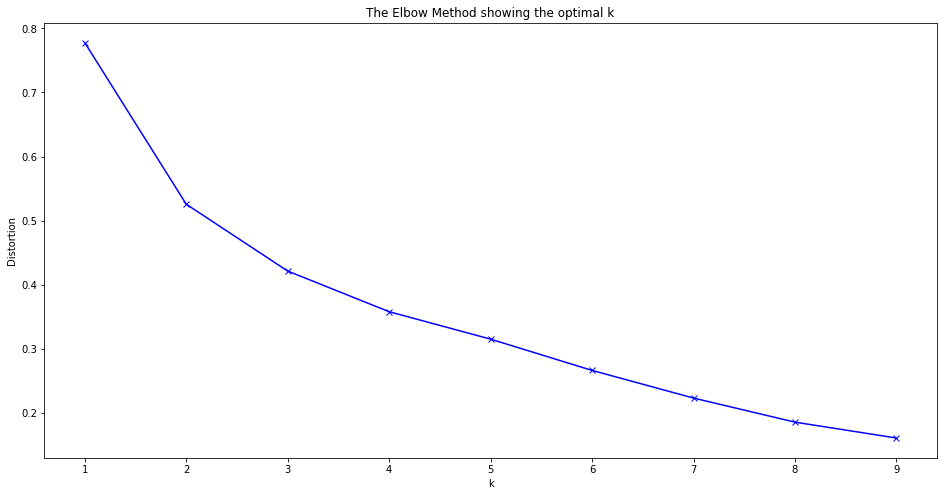

In [17]:
#One more import is required to plot the Elbow Method results for easy interpretation. 
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## The elbow point looks to be set at 3. So, let's use K-means clustering to create 3 groups.

In [18]:
# set number of clusters
kclusters = 3

#ct_grouped_clustering = ct_grouped.drop('Location', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ct_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 2, 2, 1, 0, 2, 1, 2, 1, 1], dtype=int32)

In [19]:
# add clustering labels
ct_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

ct_merged = data

# add latitude/longitude for each Chinatown location by merging data frames.
ct_merged = ct_merged.join(ct_venues_sorted.set_index('Location'), on='Location')

ct_merged # check the last columns!

,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"New York, NY, USA",40.717664,-74.001500,1,Chinese Restaurant,Bakery,Coffee Shop,Bubble Tea Shop,Spa,Dessert Shop,Gym / Fitness Center,Art Gallery,French Restaurant,Yoga Studio
1,"Chicago, IL, USA",41.851215,-87.634422,2,Chinese Restaurant,Dim Sum Restaurant,Asian Restaurant,Korean Restaurant,Dessert Shop,Bakery,Plaza,Ramen Restaurant,Bubble Tea Shop,Sculpture Garden
2,"Los Angeles, CA, USA",34.062888,-118.237890,2,Chinese Restaurant,Vietnamese Restaurant,Bakery,Dim Sum Restaurant,Bar,Bubble Tea Shop,Café,Burger Joint,Cajun / Creole Restaurant,French Restaurant
3,"San Francisco, CA, USA",37.790164,-122.404332,1,Coffee Shop,Boutique,Hotel,Japanese Restaurant,Bubble Tea Shop,Restaurant,Café,Clothing Store,Gym,Sushi Restaurant
4,"Philadelphia, PA, USA",39.953500,-75.156300,1,Bakery,Convenience Store,Breakfast Spot,Bubble Tea Shop,Sandwich Place,Chinese Restaurant,Noodle House,Department Store,Donut Shop,Creperie
5,"Houston, TX, USA",29.705000,-95.545300,0,Bubble Tea Shop,Vietnamese Restaurant,Chinese Restaurant,Dessert Shop,Bakery,Supermarket,Asian Restaurant,Taiwanese Restaurant,Dumpling Restaurant,Dim Sum Restaurant
6,"Honolulu, HI, USA",21.307499,-157.858497,1,Bakery,Coffee Shop,Restaurant,Gym / Fitness Center,Dessert Shop,Bar,Bagel Shop,Taco Place,Art Museum,Monument / Landmark
7,"Portland, OR, USA",45.525280,-122.672460,1,Coffee Shop,Pizza Place,Gay Bar,Hotel,Historic Site,Fried Chicken Joint,Boutique,Light Rail Station,Brewery,Taco Place
8,"Boston, MA, USA",42.350100,-71.062400,2,Chinese Restaurant,Asian Restaurant,Bakery,Theater,Hotel Bar,Sushi Restaurant,Bubble Tea Shop,Dive Bar,Hotel,Hotpot Restaurant
9,"Melbourne, Australia",-37.811800,144.967600,1,Coffee Shop,Cocktail Bar,Bubble Tea Shop,Chinese Restaurant,Japanese Restaurant,Bar,Thai Restaurant,Café,Shopping Mall,Burger Joint


In [21]:
# create map
map_clusters = folium.Map(location = [48.864716, 2.349014], zoom_start = 2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ct_merged['Latitude'], ct_merged['Longitude'], ct_merged['Location'], ct_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Cluster 1

In [22]:
cluster_1 = ct_merged["Cluster Labels"]==0
df_1 = ct_merged[cluster_1]
df_1

,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,"Houston, TX, USA",29.705000,-95.545300,0,Bubble Tea Shop,Vietnamese Restaurant,Chinese Restaurant,Dessert Shop,Bakery,Supermarket,Asian Restaurant,Taiwanese Restaurant,Dumpling Restaurant,Dim Sum Restaurant
10,"Toronto, Canada",43.666614,-79.347296,0,Vietnamese Restaurant,Chinese Restaurant,Ice Cream Shop,Bakery,Coffee Shop,Park,Café,Bistro,Beer Store,French Restaurant
11,"Paris, France",48.822220,2.365280,0,Vietnamese Restaurant,Chinese Restaurant,Asian Restaurant,Supermarket,Thai Restaurant,Cantonese Restaurant,Pastry Shop,Cambodian Restaurant,Juice Bar,Café


## Cluster 2

In [23]:
cluster_2 = ct_merged["Cluster Labels"]==1
df_2 = ct_merged[cluster_2]
df_2

,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"New York, NY, USA",40.717664,-74.001500,1,Chinese Restaurant,Bakery,Coffee Shop,Bubble Tea Shop,Spa,Dessert Shop,Gym / Fitness Center,Art Gallery,French Restaurant,Yoga Studio
3,"San Francisco, CA, USA",37.790164,-122.404332,1,Coffee Shop,Boutique,Hotel,Japanese Restaurant,Bubble Tea Shop,Restaurant,Café,Clothing Store,Gym,Sushi Restaurant
4,"Philadelphia, PA, USA",39.953500,-75.156300,1,Bakery,Convenience Store,Breakfast Spot,Bubble Tea Shop,Sandwich Place,Chinese Restaurant,Noodle House,Department Store,Donut Shop,Creperie
6,"Honolulu, HI, USA",21.307499,-157.858497,1,Bakery,Coffee Shop,Restaurant,Gym / Fitness Center,Dessert Shop,Bar,Bagel Shop,Taco Place,Art Museum,Monument / Landmark
7,"Portland, OR, USA",45.525280,-122.672460,1,Coffee Shop,Pizza Place,Gay Bar,Hotel,Historic Site,Fried Chicken Joint,Boutique,Light Rail Station,Brewery,Taco Place
9,"Melbourne, Australia",-37.811800,144.967600,1,Coffee Shop,Cocktail Bar,Bubble Tea Shop,Chinese Restaurant,Japanese Restaurant,Bar,Thai Restaurant,Café,Shopping Mall,Burger Joint
12,"London, UK",51.506665,-0.125499,1,Hotel,Pub,Theater,Sandwich Place,Plaza,Outdoor Sculpture,Boat or Ferry,Café,Monument / Landmark,Spa
13,"Amsterdam, Netherlands",52.373900,4.900100,1,Bar,Hotel,Coffee Shop,Bakery,Café,Pub,Chinese Restaurant,Museum,Church,Breakfast Spot
15,"Manchester, UK",53.478600,-2.240100,1,Gay Bar,Hotel,Italian Restaurant,Pub,Chinese Restaurant,Pharmacy,Sandwich Place,Thai Restaurant,Indian Restaurant,Pizza Place


## Cluster 3

In [24]:
cluster_3 = ct_merged["Cluster Labels"]==2
df_3 = ct_merged[cluster_3]
df_3

,Location,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Chicago, IL, USA",41.851215,-87.634422,2,Chinese Restaurant,Dim Sum Restaurant,Asian Restaurant,Korean Restaurant,Dessert Shop,Bakery,Plaza,Ramen Restaurant,Bubble Tea Shop,Sculpture Garden
2,"Los Angeles, CA, USA",34.062888,-118.237890,2,Chinese Restaurant,Vietnamese Restaurant,Bakery,Dim Sum Restaurant,Bar,Bubble Tea Shop,Café,Burger Joint,Cajun / Creole Restaurant,French Restaurant
8,"Boston, MA, USA",42.350100,-71.062400,2,Chinese Restaurant,Asian Restaurant,Bakery,Theater,Hotel Bar,Sushi Restaurant,Bubble Tea Shop,Dive Bar,Hotel,Hotpot Restaurant
14,"Lima, Peru",-12.052400,-77.025500,2,Chinese Restaurant,Asian Restaurant,Market,Convenience Store,Dim Sum Restaurant,Snack Place,Shop & Service,Seafood Restaurant,Bookstore,Flea Market


## Save these data frames as Excel spreadsheets for later use.

In [25]:
df_1.to_excel("cluster_1.xlsx", index = False)

df_2.to_excel("cluster_2.xlsx", index = False)

df_3.to_excel("cluster_3.xlsx", index = False)

In [26]:
ct_merged.to_excel("ct_merged.xlsx", index = False)